STEP 1 — Export Final Table

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\hp\OneDrive\Pictures\vendor_performance.csv')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   2                                        135 non-null    int64  
 1   IRA GOLDMAN AND WILLIAMS, LLP            135 non-null    object 
 2   1265.58                                  135 non-null    float64
 3   5630.88                                  135 non-null    object 
 4   -4365.30                                 135 non-null    object 
 5   -344.92                                  135 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.5+ KB


STEP 2 — Load in Python

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\hp\OneDrive\Pictures\vendor_performance.csv', header=None)
df.columns = [
    "VendorNo",
    "VendorName",
    "total_sales",
    "total_purchase",
    "gross_profit",
    "profit_margin"
]
numeric_cols = ["total_sales", "total_purchase", "gross_profit", "profit_margin"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VendorNo        136 non-null    int64  
 1   VendorName      136 non-null    object 
 2   total_sales     136 non-null    float64
 3   total_purchase  133 non-null    float64
 4   gross_profit    133 non-null    float64
 5   profit_margin   133 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


STEP 3 — Clean Data

Handle missing values (because LEFT JOIN may produce NULL):

In [14]:
df.fillna(0, inplace=True)


STEP 4 — Quick EDA
Distribution of Sales

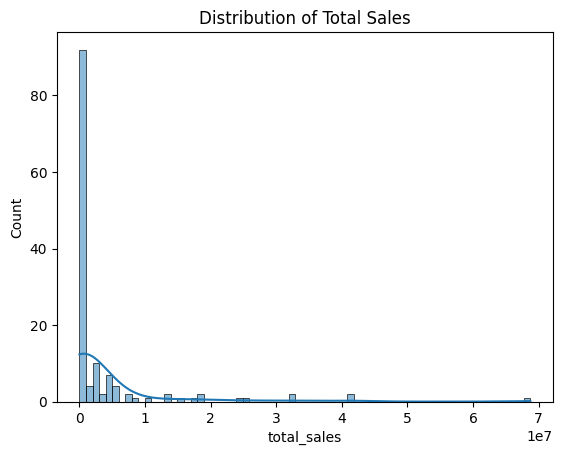

In [15]:
plt.figure()
sns.histplot(df["total_sales"], kde=True)
plt.title("Distribution of Total Sales")
plt.show()

Top 10 Vendors

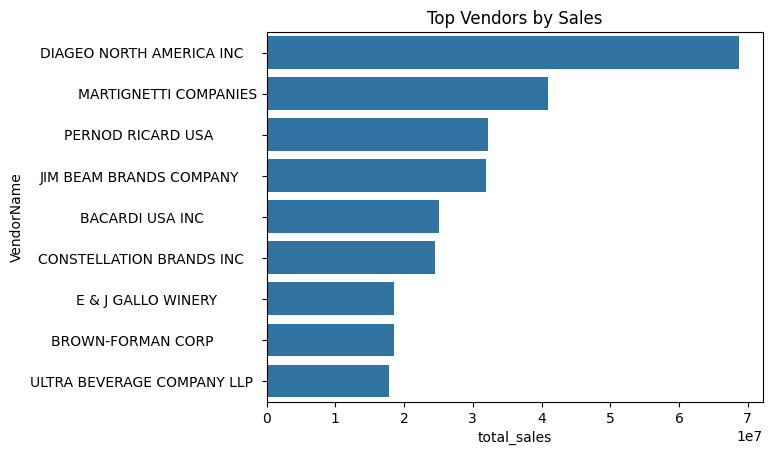

In [16]:
top = df.sort_values("total_sales", ascending=False).head(10)

plt.figure()
sns.barplot(x="total_sales", y="VendorName", data=top)
plt.title("Top Vendors by Sales")
plt.show()

Sales vs Profit

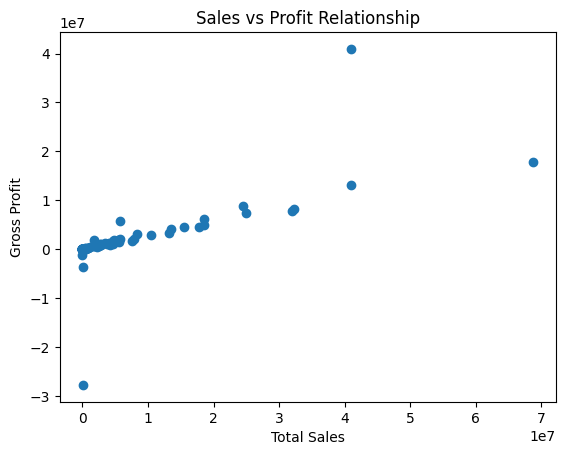

In [17]:
plt.figure()
plt.scatter(df["total_sales"], df["gross_profit"])
plt.xlabel("Total Sales")
plt.ylabel("Gross Profit")
plt.title("Sales vs Profit Relationship")
plt.show()

STEP 5 — Hypothesis Testing

Test:

 Do high sales vendors have higher profit margins?

In [18]:
from scipy import stats

median_sales = df["total_sales"].median()

high = df[df["total_sales"] >= median_sales]["profit_margin"]
low = df[df["total_sales"] < median_sales]["profit_margin"]

t_stat, p_value = stats.ttest_ind(high, low)

print("P-value:", p_value)

P-value: 0.11976410605397958


If p-value < 0.05
→ Statistically significant difference.

STEP 6 — ML Model (Vendor Classification)
Create Performance Label

In [19]:
df["performance_score"] = df["gross_profit"] / df["total_purchase"]

df["performance_category"] = np.where(
    df["performance_score"] > df["performance_score"].quantile(0.66),
    "High",
    np.where(
        df["performance_score"] > df["performance_score"].quantile(0.33),
        "Medium",
        "Low"
    )
)

Train Random Forest

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[["total_sales", "total_purchase", "gross_profit"]]
y = df["performance_category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.83      0.50      0.62        10
         Low       0.88      0.78      0.82         9
      Medium       0.57      0.89      0.70         9

    accuracy                           0.71        28
   macro avg       0.76      0.72      0.71        28
weighted avg       0.76      0.71      0.71        28



STEP 7 — Export Final File for Power BI

In [21]:
df.to_csv("vendor_final.csv", index=False)

In [22]:
import os
os.getcwd()

'C:\\Users\\hp\\Desktop'